In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(training_images, training_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
data_names = ("t-shirt", "pants", "pullover", "dress", "coat", "sandal", "shirt","sneaker","bag","ankle boot")
training_images = keras.utils.normalize(training_images, axis=1)
test_images = keras.utils.normalize(test_images, axis=1)


4422102/4422102 [==============================] - 0s 0us/step


Sample 1 in training dataset:


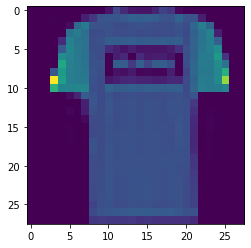

Sample label: t-shirt


In [ ]:
SAMPLE_INDEX = 1
print("Sample %d in training dataset:" % SAMPLE_INDEX)
plt.imshow(training_images[SAMPLE_INDEX])
plt.show()
print("Sample label: %s" % data_names[training_labels[SAMPLE_INDEX]])

In [ ]:
from tensorflow.python import metrics
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape =(28,28)))
model.add(keras.layers.Dense(units=256,activation='relu'))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images, training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4691 - accuracy: 0.8275
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3484 - accuracy: 0.8706
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3115 - accuracy: 0.8833
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2877 - accuracy: 0.8912
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2666 - accuracy: 0.8983


In [ ]:
eval_loss, eval_accuracy = model.evaluate(test_images,test_labels)
print("Test loss/cost: %.5f" % eval_loss)
print("Test accuracy: %.5f" % eval_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.8762
Test loss/cost: 0.34262
Test accuracy: 0.87620


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Sample 35 in testing dataset:


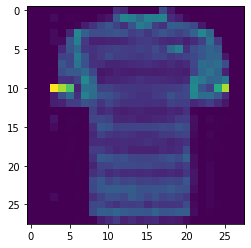

Prediction: t-shirt
Actual: t-shirt



In [ ]:
INDEX = 35
print("Sample %d in testing dataset:" % INDEX)
plt.imshow(test_images[INDEX])
plt.show()
print("Prediction: %s\nActual: %s\n" % (data_names[np.argmax(predictions[INDEX])], data_names[test_labels[INDEX]]))

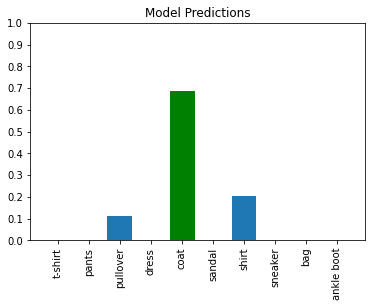

In [ ]:
plt.title('Model Predictions')
plt.xticks(np.arange(10), data_names, rotation=90)
plt.yticks(np.arange(0, 1.1, .1))
plt.ylim(0, 1)
plot_bar = plt.bar(range(10), predictions[INDEX])
plot_bar[np.argmax(predictions[INDEX])].set_color('red')
plot_bar[test_labels[INDEX]].set_color('green')